In [2]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub



In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
IMAGE_SHAPE=(224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])
classifier.trainable=False

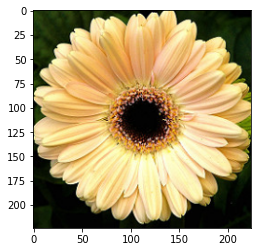

In [10]:
image=Image.open("/content/drive/MyDrive/Colab Notebooks/Flower classification Tensorflow/flowers/daisy/107592979_aaa9cdfe78_m.jpg").resize(IMAGE_SHAPE)
plt.imshow(image)

In [ ]:
flower=np.array(image)/255
flower=flower[np.newaxis, ...]

result=classifier.predict(flower)
Max_result=np.argmax(result)

image_lables=[]
with open("/content/drive/MyDrive/Colab Notebooks/Flower classification Tensorflow/flowers/LICENSE.txt","r") as f:
  image_labels=f.read().splitlines()
image_labels[Max_result]

In [35]:
flower_folder=r"/content/drive/MyDrive/Colab Notebooks/Flower classification Tensorflow/flowers"
catagories=['daisy','dandelion','rose','sunflower','tulip',]

In [ ]:
data=[]
for Catagories in catagories:
  Folder=os.path.join(flower_folder,Catagories)
  label=catagories.index(Catagories)

  for img in os.listdir(Folder):
    image=os.path.join(Folder,img)
    image_arr=cv2.imread(image)
    image_arr=cv2.resize(image_arr,IMAGE_SHAPE)
    data.append([image_arr,label])


In [ ]:
data

In [ ]:
import random
random.shuffle(data)
x=[]
y=[]
for feature,label in data :
  x.append(feature)
  y.append(label)

x=np.array(x)
y=np.array(y)

x=x/255
x

In [ ]:
x.shape

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [30]:
previous_model=hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape=IMAGE_SHAPE+(3,),
    trainable=False
)

In [ ]:
number_of_flower=5
model = tf.keras.Sequential([
                 previous_model,
                 tf.keras.layers.Dense(number_of_flower)          
])
model.summary()

In [32]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
38/38 [==============================] - 5s 48ms/step - loss: 0.5740 - acc: 0.7338
Epoch 2/5
38/38 [==============================] - 1s 39ms/step - loss: 0.2309 - acc: 0.8964
Epoch 3/5
38/38 [==============================] - 1s 39ms/step - loss: 0.1859 - acc: 0.9187
Epoch 4/5
38/38 [==============================] - 2s 40ms/step - loss: 0.1588 - acc: 0.9312
Epoch 5/5
38/38 [==============================] - 1s 39ms/step - loss: 0.1402 - acc: 0.9436


In [33]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 66ms/step - loss: 0.2084 - acc: 0.9204


[0.20838309824466705, 0.9203979969024658]